# **Prepare and setup environment**

In [84]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [85]:
# load dataset
df = pd.read_csv('wdbc.data')
df.columns= ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [86]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [87]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [88]:
df=df.drop(columns=['id'])

In [89]:
df.shape

(568, 31)

In [90]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [91]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [92]:
df.isnull().values.any()

False

In [93]:
df['diagnosis'].value_counts(normalize=True)

B    0.628521
M    0.371479
Name: diagnosis, dtype: float64

<Axes: >

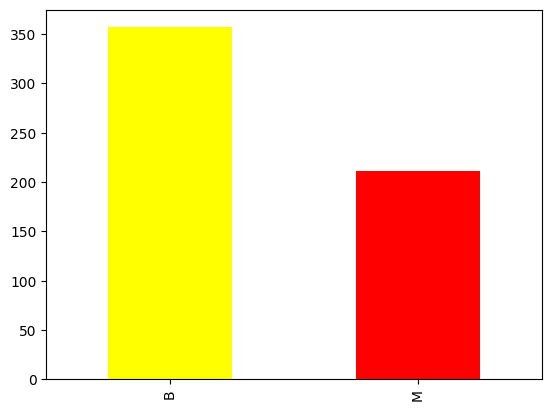

In [94]:
df['diagnosis'].value_counts().plot.bar(color=['yellow', 'red'])

As we can see from the bar chart above, this dataset has two classes: `B` and `M`. The labels are imbalanced.

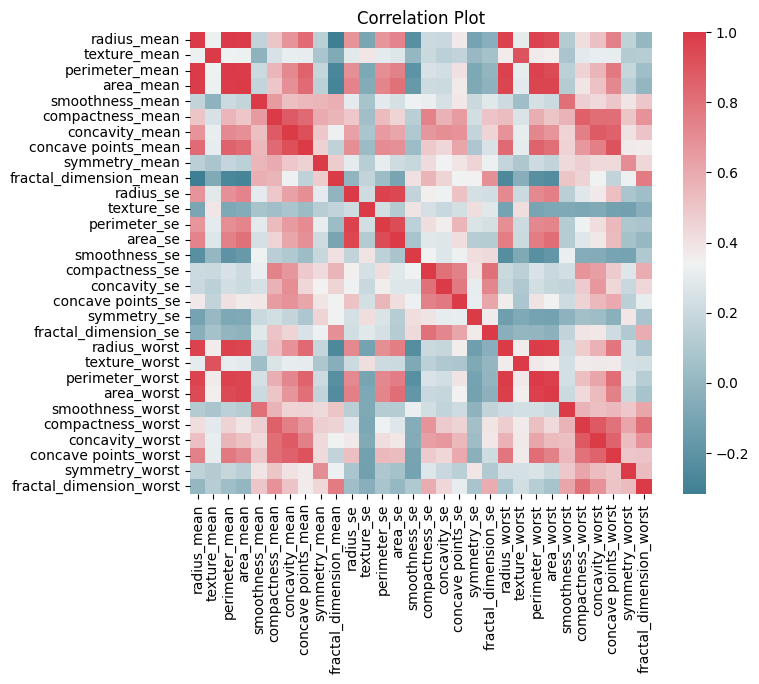

In [95]:
cor= df.corr(method='pearson')
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


In [106]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.sort_values(ascending=False)
    return au_corr[31:31+n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations
radius_mean      perimeter_mean     0.997876
perimeter_worst  radius_worst       0.993814
radius_worst     perimeter_worst    0.993814
radius_mean      area_mean          0.987344
area_mean        radius_mean        0.987344
perimeter_mean   area_mean          0.986548
area_mean        perimeter_mean     0.986548
radius_worst     area_worst         0.983919
area_worst       radius_worst       0.983919
perimeter_worst  area_worst         0.977475
dtype: float64


# **Feature Engineering**

In [96]:
X_raw = df.iloc[:, 1:]
y_raw = df.iloc[:, 0]

Fortunately, all feature columns are numeric so we just need to scale them. Here we use the `MinMaxScaler` provided by `sklearn` for scaling.
For the target variable `y`, let's use the `LabelEncoder` provided by `sklearn` to encode its three class values.

In [97]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [98]:
# Scaling the raw input features
X = scaler.fit_transform(X_raw)

In [99]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0000000000000002


In [100]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [101]:
# Encode the target variable
y = label_encoder.fit_transform(y_raw.values.ravel())

In [102]:
np.unique(y, return_counts=True)

(array([0, 1]), array([357, 211]))

# **Split Data**

First, let's split the training and testing dataset. Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Using stratified split due to imbalance in classes.

In [103]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

In [64]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (454, 30), y_train: (454,)
Testing dataset shape, X_test: (114, 30), y_test: (114,)


# **Hyper-parameter Tuning**

In [73]:
models = [
          LogisticRegression(),
          RandomForestClassifier(random_state=42),
          SVC(),
          KNeighborsClassifier(),
          GaussianNB(),
          DecisionTreeClassifier(),
          SGDClassifier()
          ]
params = [
          {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]},
          { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy']},
          {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
          {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'], 'n_jobs':[-1]},
          {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]},
          {'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.1, .01, .001], 'max_depth' : [5, 6, 7, 8, 9], 'criterion' :['gini', 'entropy']},
          {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 'loss': ['log'], 'penalty': ['l2'], 'n_jobs': [-1]}
          ]
cv_models=[]
best_params=[]
accuracies=[]
for model, param in zip(models, params):
    cv = GridSearchCV(model, param, cv=10)
    cv_models.append(cv)
    cv.fit(X_train, y_train)
    best_params.append(cv.best_params_)
    accuracies.append(cv.best_score_)

In [74]:
for model,best_param,accuracy in zip(models,best_params,accuracies):
  print("model name: ",model)
  print("best parameters are: ", best_param)
  print("accuracy: ", accuracy)

model name:  LogisticRegression()
best parameters are:  {'C': 100.0, 'penalty': 'l2'}
accuracy:  0.9757004830917875
model name:  RandomForestClassifier(random_state=42)
best parameters are:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
accuracy:  0.9668115942028985
model name:  SVC()
best parameters are:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
accuracy:  0.9779710144927536
model name:  KNeighborsClassifier()
best parameters are:  {'n_jobs': -1, 'n_neighbors': 13, 'weights': 'distance'}
accuracy:  0.9714009661835747
model name:  GaussianNB()
best parameters are:  {'var_smoothing': 0.001}
accuracy:  0.9337198067632851
model name:  DecisionTreeClassifier()
best parameters are:  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}
accuracy:  0.9537681159420289
model name:  SGDClassifier()
best parameters are:  {'alpha': 0.001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}
accuracy:  0.9779227053140097


# **Model Training**

We observe that SVC() with best parameters as:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'} provides highest accuracy= 0.9779710144927536

In [75]:
model = SVC(C=10, gamma= 1, kernel= 'rbf')

In [76]:
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [77]:
r2_score(y_train, y_predict)

0.9622962732274474

# **Results**

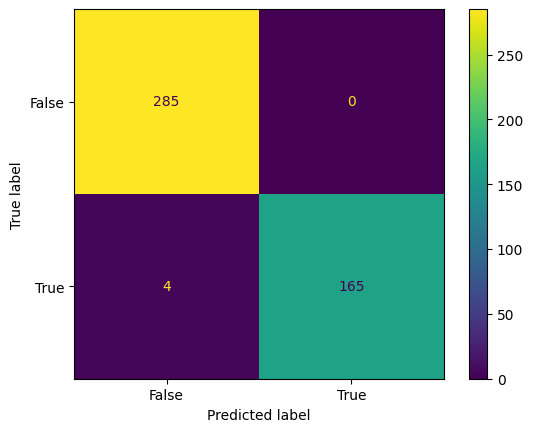

In [80]:
confusion_matrix = metrics.confusion_matrix(y_train, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [114]:
Accuracy = metrics.accuracy_score(y_train, y_predict)
Precision = metrics.precision_score(y_train, y_predict)
Sensitivity_recall = metrics.recall_score(y_train, y_predict)
Specificity = metrics.recall_score(y_train, y_predict, pos_label=0)
F1_score = metrics.f1_score(y_train, y_predict)
results= {"Accuracy":Accuracy, "Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}
for i,j in zip(results.keys(),results.values()):
  print(i,j)

Accuracy 0.9911894273127754
Precision 1.0
Sensitivity_recall 0.9763313609467456
Specificity 1.0
F1_score 0.9880239520958084
